<a href="https://colab.research.google.com/github/Jacobgokul/ML-Playground/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

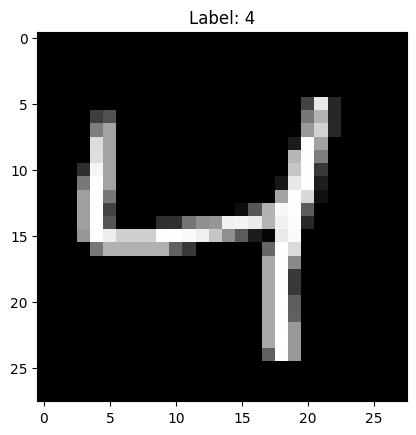

In [5]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values (0-255 → 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Display a sample image
plt.imshow(x_train[2], cmap='gray')
plt.title(f"Label: {y_train[2]}")
plt.show()

In [6]:
# Define the ANN model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Convert 2D image to 1D vector
    Dense(128, activation='relu'),  # First hidden layer with 128 neurons
    Dense(64, activation='relu'),   # Second hidden layer with 64 neurons
    Dense(10, activation='softmax') # Output layer for 10 classes (0-9)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Sequential() Model
Sequential means the model follows a step-by-step linear stack of layers.

It is the simplest way to build a neural network.

2️⃣ Flatten(input_shape=(28, 28))
Converts each 28×28 image into a 1D array of 784 values.

Neural networks process flat vectors, so we need this conversion.

3️⃣ Dense(128, activation='relu') (First Hidden Layer)
Dense means fully connected layer (each neuron connects to all previous neurons).

128 neurons are used for learning features.

ReLU (Rectified Linear Unit) is used as the activation function:

Formula:
𝑓
(
𝑥
)
=
max
⁡
(
0
,
𝑥
)
f(x)=max(0,x)

Why ReLU?

It helps overcome the vanishing gradient problem.

It introduces non-linearity, allowing the model to learn complex patterns.

4️⃣ Dense(64, activation='relu') (Second Hidden Layer)
Another fully connected layer with 64 neurons.

Again, ReLU activation helps the model learn complex features.

5️⃣ Dense(10, activation='softmax') (Output Layer)
The final layer has 10 neurons, corresponding to digits 0-9.

Softmax activation is used:

Converts raw output values into probabilities.

Ensures the sum of all probabilities is 1.

The highest probability indicates the predicted digit.

In [7]:
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Adam Optimizer:

Adjusts weights efficiently during training.

Uses a combination of momentum and adaptive learning rate for faster convergence.

Loss Function (sparse_categorical_crossentropy):

Used for multi-class classification when labels are integers (0-9).

Why not categorical_crossentropy?

sparse_categorical_crossentropy is used when labels are not one-hot encoded (e.g., y_train = [0, 1, 5, 9] instead of [1,0,0,...]).

Metric (accuracy):

Measures how many predictions are correct.

In [8]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8793 - loss: 0.4170 - val_accuracy: 0.9596 - val_loss: 0.1274
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.9694 - loss: 0.1024 - val_accuracy: 0.9692 - val_loss: 0.1001
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9785 - loss: 0.0685 - val_accuracy: 0.9745 - val_loss: 0.0849
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9835 - loss: 0.0527 - val_accuracy: 0.9758 - val_loss: 0.0783
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9881 - loss: 0.0397 - val_accuracy: 0.9775 - val_loss: 0.0798
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9893 - loss: 0.0317 - val_accuracy: 0.9788 - val_loss: 0.0788
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9917 - loss: 0.0269 - val_accuracy: 0.9791 - val_loss: 0.0755
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9924 - loss: 0

epochs=10: The model goes through the entire dataset 10 times.

Validation Data: Evaluates performance on unseen test data after each epoch.

The model updates its weights after each epoch based on training loss.



In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9739 - loss: 0.1095
Test Accuracy: 0.98


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


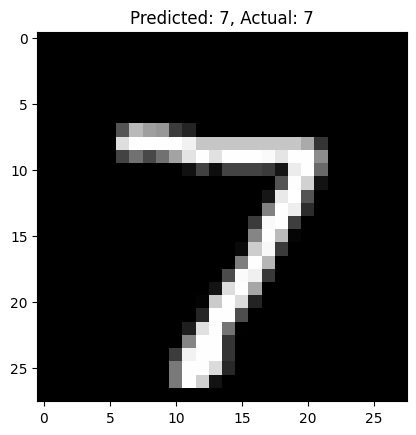

In [14]:
predictions = model.predict(x_test)
predicted_label = np.argmax(predictions[0])  # Get the most probable digit

# Show the predicted and actual label
plt.imshow(x_test[0], cmap='gray')
plt.title(f"Predicted: {predicted_label}, Actual: {y_test[0]}")
plt.show()
